# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [2]:
library(tidyverse)

setwd("/Users/david/Documents/GitHub_Repos/Dickman_DSPN_S22")
data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

d1 <- data %>% select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol)
d1 <- drop_na(d1)

head(d1)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

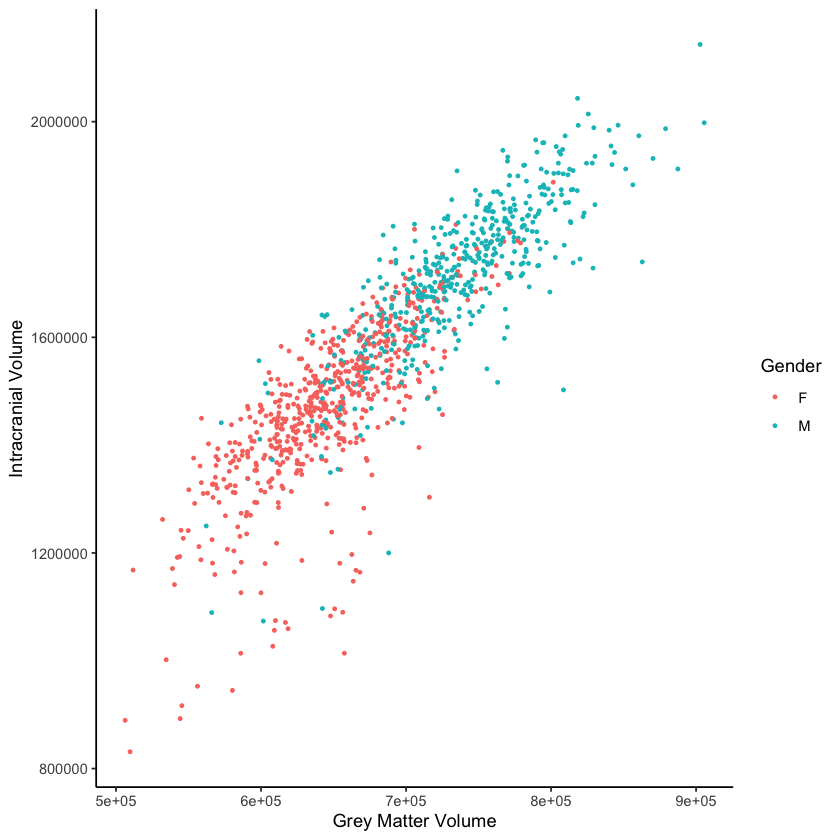

In [3]:
ggplot(d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
        geom_point(size=0.7) +
        theme_classic() +
        scale_x_continuous(name = 'Grey Matter Volume') +
        scale_y_continuous(name = 'Intracranial Volume')

What patterns do you observe in the scatter plot?

> *There appears to be a positive correlation between grey matter volume and intracranial volume, where greater grey matter volume relates with greater intracranial volumne. Females and males seem to be clustered, where females tend to have  lower grey matter volume and lower intracranial volumne than males.* 
> 

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [4]:
d1$Gender <- as.factor(d1$Gender)

glm.fit <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = "binomial")
summary(glm.fit)



Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = "binomial", data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *Total grey matter and instracranial volume are both significantly related with gender. Men seem to have greater intracranial and grey matter volume compared to women* 
> 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [5]:
predictdata = data.frame(predict(glm.fit, type = "response"))
colnames(predictdata) = c('predicted_prob')

num_observations = nrow(predictdata)
predictdata$index = seq(1, num_observations) 

threshold = 0.50 #binarizing threshold

# First make a list of "F"
predictdata$predicted_binary=rep("F", num_observations)

# Then use the probability output to label the correct values/1. Let's use a threshold of 50% probability. 
predictdata$predicted_binary[predictdata$predicted_prob>threshold]="M" #find the rows that have prob > threshold and cast as '1'

# Now let's look at the prediction accuracy
predict_df = data.frame(predictdata$predicted_binary, d1$Gender)
colnames(predict_df) = c('predicted', 'actual')

table(predict_df)

print(paste("Accuracy:",mean(predict_df$predicted == predict_df$actual)))


         actual
predicted   F   M
        F 516 110
        M  90 397

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

>*The prediction accuracy for gender is 0.82. The model is correct ~82% of the time in estimating Gender*
> 

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] 0.8203055

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original     bias    std. error
t1* 0.8203055 -0.3151375  0.01493971


[1] 0.8497231

[1] 0.7908879

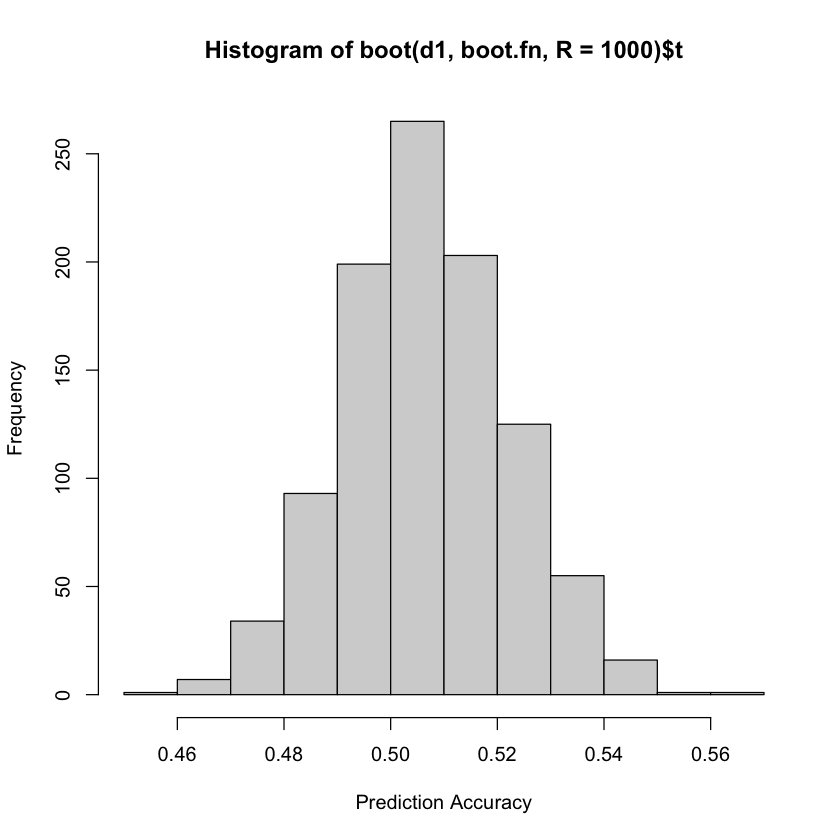

In [6]:
library(ISLR)
library(boot)

#Estimating confidence intervals with bootstrapping
# The function needs two inputs: Data, Index
boot.fn <- function(data, index){ 
    glm.fit = glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=data, subset = index, family="binomial") 
    predictdata = data.frame(predict(glm.fit, type = "response"))
    colnames(predictdata) = c('predicted_prob')
    num_observations = nrow(predictdata)
    predictdata$index = seq(1, num_observations) 
    threshold = 0.50
    predictdata$predicted_binary=rep("F", num_observations)
    predictdata$predicted_binary[predictdata$predicted_prob>threshold]="M" 
    predict_df = data.frame(predictdata$predicted_binary, d1$Gender)
    colnames(predict_df) = c('predicted', 'actual')
    table(predict_df)
    return(mean(predict_df$predicted == predict_df$actual))
           }
print(boot.fn(d1, 1:1113))

boot.d1 = boot(d1, boot.fn, R=1000)
print(boot.d1)

# Histogram of bootstrapped prediction accuracies
hist(boot(d1, boot.fn, R=1000)$t, xlab="Prediction Accuracy")

# Confidence Intervals
# 95% CI = mean +- 1.96*standard error 
# note these standard error values change everytime i rerun the bootstrapping, so the below code may be a little off. 
CIvalue = 1.96* 0.01500897
0.8203055 + CIvalue
0.8203055 - CIvalue



How robust is the prediction accuracy of the full model?

> *The original estimate for prediction accuracy of .82 has a 95% confidence interval of .79 - .85. While this confidence interval is relatively small, the large bias value of -.31 suggestions that the prediction accuracy may not be as robust. * 
> 

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

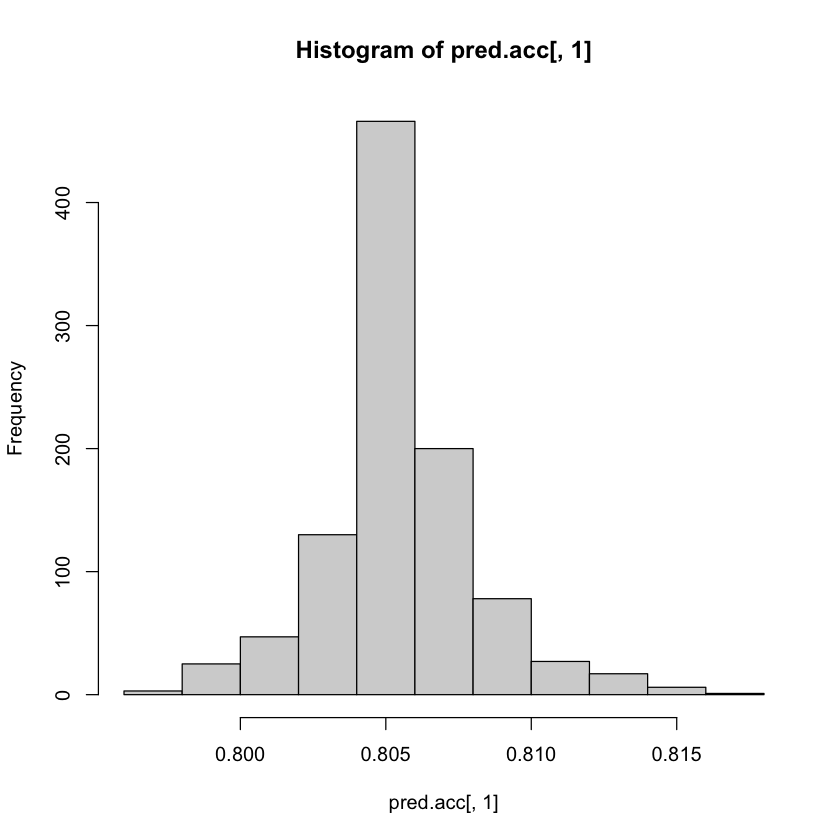

In [8]:
# Creating a copy of the data set that we'll keep permuting
permd1 = d1 

# Number of iterations
R=1000

# make an output object to store the results
perm.coefs = matrix(NA, nrow=R, ncol=4) 
pred.acc=matrix(NA, nrow=R, ncol=1) 
predacc.real=matrix(0.820305480682839, nrow=R, ncol=1)


# Create function and write a for loop where we scramble the observations
perm.fn <- function(data, model){ 
    df = data.frame(predict(model, type = "response"))
    colnames(df) = c('predicted_prob')
    num_observations = nrow(df)
    df$index = seq(1, num_observations) 
    threshold = 0.50
    df$predicted_binary=rep("F", num_observations)
    df$predicted_binary[df$predicted_prob>threshold]="M" 
    predict_df = data.frame(df$predicted_binary, d1$Gender)
    colnames(predict_df) = c('predicted', 'actual')
    table(predict_df)
    return(mean(predict_df$predicted == predict_df$actual))
           }

for (i in 1:R){
  permd1$FS_Total_GM_Vol=d1$FS_Total_GM_Vol[sample(1113)] 
  perm.coefs[i,] = coef(glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = permd1, family = "binomial"))
  glm = glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = permd1, family = "binomial")
  pred.acc[i,]=perm.fn(permd1, glm)
}

# Distributions of prediction accuracy
hist(pred.acc[,1])
abline(v=0.820)



How much does the grey matter volume influence the prediction accuracy of the model?

In [10]:
#sum the prediction accuracy greater than the estimate
#and divide by the number of repetitions to get an empirical probability 
perm.p = sum(pred.acc[,1]>0.820305480682839)/R 
perm.p

[1] 0

> *Grey matter volume appears to influence the predictin accuracy of gender in the model. The real prediction accuracy (0.82) is much larger than the range of coefficient estimates we see for the permuted datasets - it falls outside the range of values in our empirically derived null distribution. When we empirically calculate the probability of observing a value greater than our estimate, there are no permuted models that produce results that overlap with the results from the intact model. We can reject the null hypothesis that the impact of total grey matter volume on prediction accuracy of gender is zero.* 
> 

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *Bootstrapping allows you to quantify uncertainty by using random resampling of data with replacement. It is used when you want to investigate a plausible range of expected values for an estimate/relationship between x and y. Permutation, however, allows you to break a relationship between x and y while maintaining the structure between other variables. This is useful for targeted null hypothesis testing and allows you to answer questions related to y as if there were no statistical relationship between x and y.*

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Delainey Wescott & Isabella Kahhale*